In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [5]:
milk = pd.read_csv('milk.csv').set_index('Animal')

In [6]:
milk

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [16]:
scaler = StandardScaler().set_output(transform='pandas')
milk_scl = scaler.fit_transform(milk)

prcomp = PCA().set_output(transform='pandas')

scores = prcomp.fit_transform(milk_scl)
scores

,pca0,pca1,pca2,pca3,pca4
Animal,,,,,
HORSE,2.435175,-0.231478,0.330150,0.307664,0.048184
ORANGUTAN,2.258736,-0.693148,0.029035,-0.081057,-0.000532
MONKEY,2.335861,-0.663328,0.101257,0.247997,0.010109
DONKEY,2.318677,-0.273815,0.109881,-0.092873,-0.006769
HIPPO,2.060294,-1.019199,-0.762436,-0.510091,0.029382
CAMEL,1.301536,0.137303,-0.198742,-0.282160,-0.014668
BISON,1.282742,0.622667,0.253785,0.065148,-0.044486
BUFFALO,0.505068,0.088235,0.008383,0.133774,0.083806
GUINEA PIG,-0.255502,0.287373,-0.881857,-0.013100,-0.016484


In [21]:
var_cov = np.cov(milk_scl.T)
values,vectors = np.linalg.eig(var_cov)

In [31]:
vectors

array([[-0.47294379,  0.35285509, -0.70967042,  0.36921298,  0.10893632],
       [ 0.46657047,  0.32094099, -0.1930657 ,  0.15196177, -0.78672876],
       [ 0.44868269, -0.47603724, -0.66831106, -0.30699163,  0.17660367],
       [-0.48289116,  0.05951482, -0.11159049, -0.77642589, -0.38468756],
       [ 0.35232959,  0.73643513,  0.00118661, -0.378825  ,  0.43590982]])

In [22]:
values

array([4.0404117 , 0.92437238, 0.00656977, 0.13429088, 0.1026886 ])

In [23]:
scores.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

*Variances of the PCA scores are nothing but the eigen values of variance_covariance matrix

Var(PC1)>Var(PC2).......... >Var(PCk)

In [24]:
prcomp.components_

array([[ 0.47294379, -0.46657047, -0.44868269,  0.48289116, -0.35232959],
       [ 0.35285509,  0.32094099, -0.47603724,  0.05951482,  0.73643513],
       [-0.36921298, -0.15196177,  0.30699163,  0.77642589,  0.378825  ],
       [-0.10893632,  0.78672876, -0.17660367,  0.38468756, -0.43590982],
       [ 0.70967042,  0.1930657 ,  0.66831106,  0.11159049, -0.00118661]])

Total Variation

In [27]:
total_var= scores.var().sum()
total_var

5.208333333333337

Percentage Variations Explained

In [28]:
# (scores.var()/total_var)*100

pca0    77.575905
pca1    17.747950
pca2     2.578385
pca3     1.971621
pca4     0.126140
dtype: float64

In [30]:
prcomp.explained_variance_ratio_*100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

In [32]:
scores

,pca0,pca1,pca2,pca3,pca4
Animal,,,,,
HORSE,2.435175,-0.231478,0.330150,0.307664,0.048184
ORANGUTAN,2.258736,-0.693148,0.029035,-0.081057,-0.000532
MONKEY,2.335861,-0.663328,0.101257,0.247997,0.010109
DONKEY,2.318677,-0.273815,0.109881,-0.092873,-0.006769
HIPPO,2.060294,-1.019199,-0.762436,-0.510091,0.029382
CAMEL,1.301536,0.137303,-0.198742,-0.282160,-0.014668
BISON,1.282742,0.622667,0.253785,0.065148,-0.044486
BUFFALO,0.505068,0.088235,0.008383,0.133774,0.083806
GUINEA PIG,-0.255502,0.287373,-0.881857,-0.013100,-0.016484


### Biplot

In [33]:
from pca import pca

In [34]:
milk_scl

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988
CAMEL,0.757707,-0.757806,-0.670322,0.372182,-0.309730
BISON,0.694008,-0.394551,-0.835283,0.873626,0.074400
BUFFALO,0.311810,-0.087181,-0.233662,0.316466,-0.168208
GUINEA PIG,0.295885,0.331959,-0.301587,-0.797852,-0.026687


In [36]:
import matplotlib.pyplot as plt
model = pca ()
results = model.fit_transform(milk_scl, col_labels= list(milk.columns), row_labels= list(milk.index))

[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


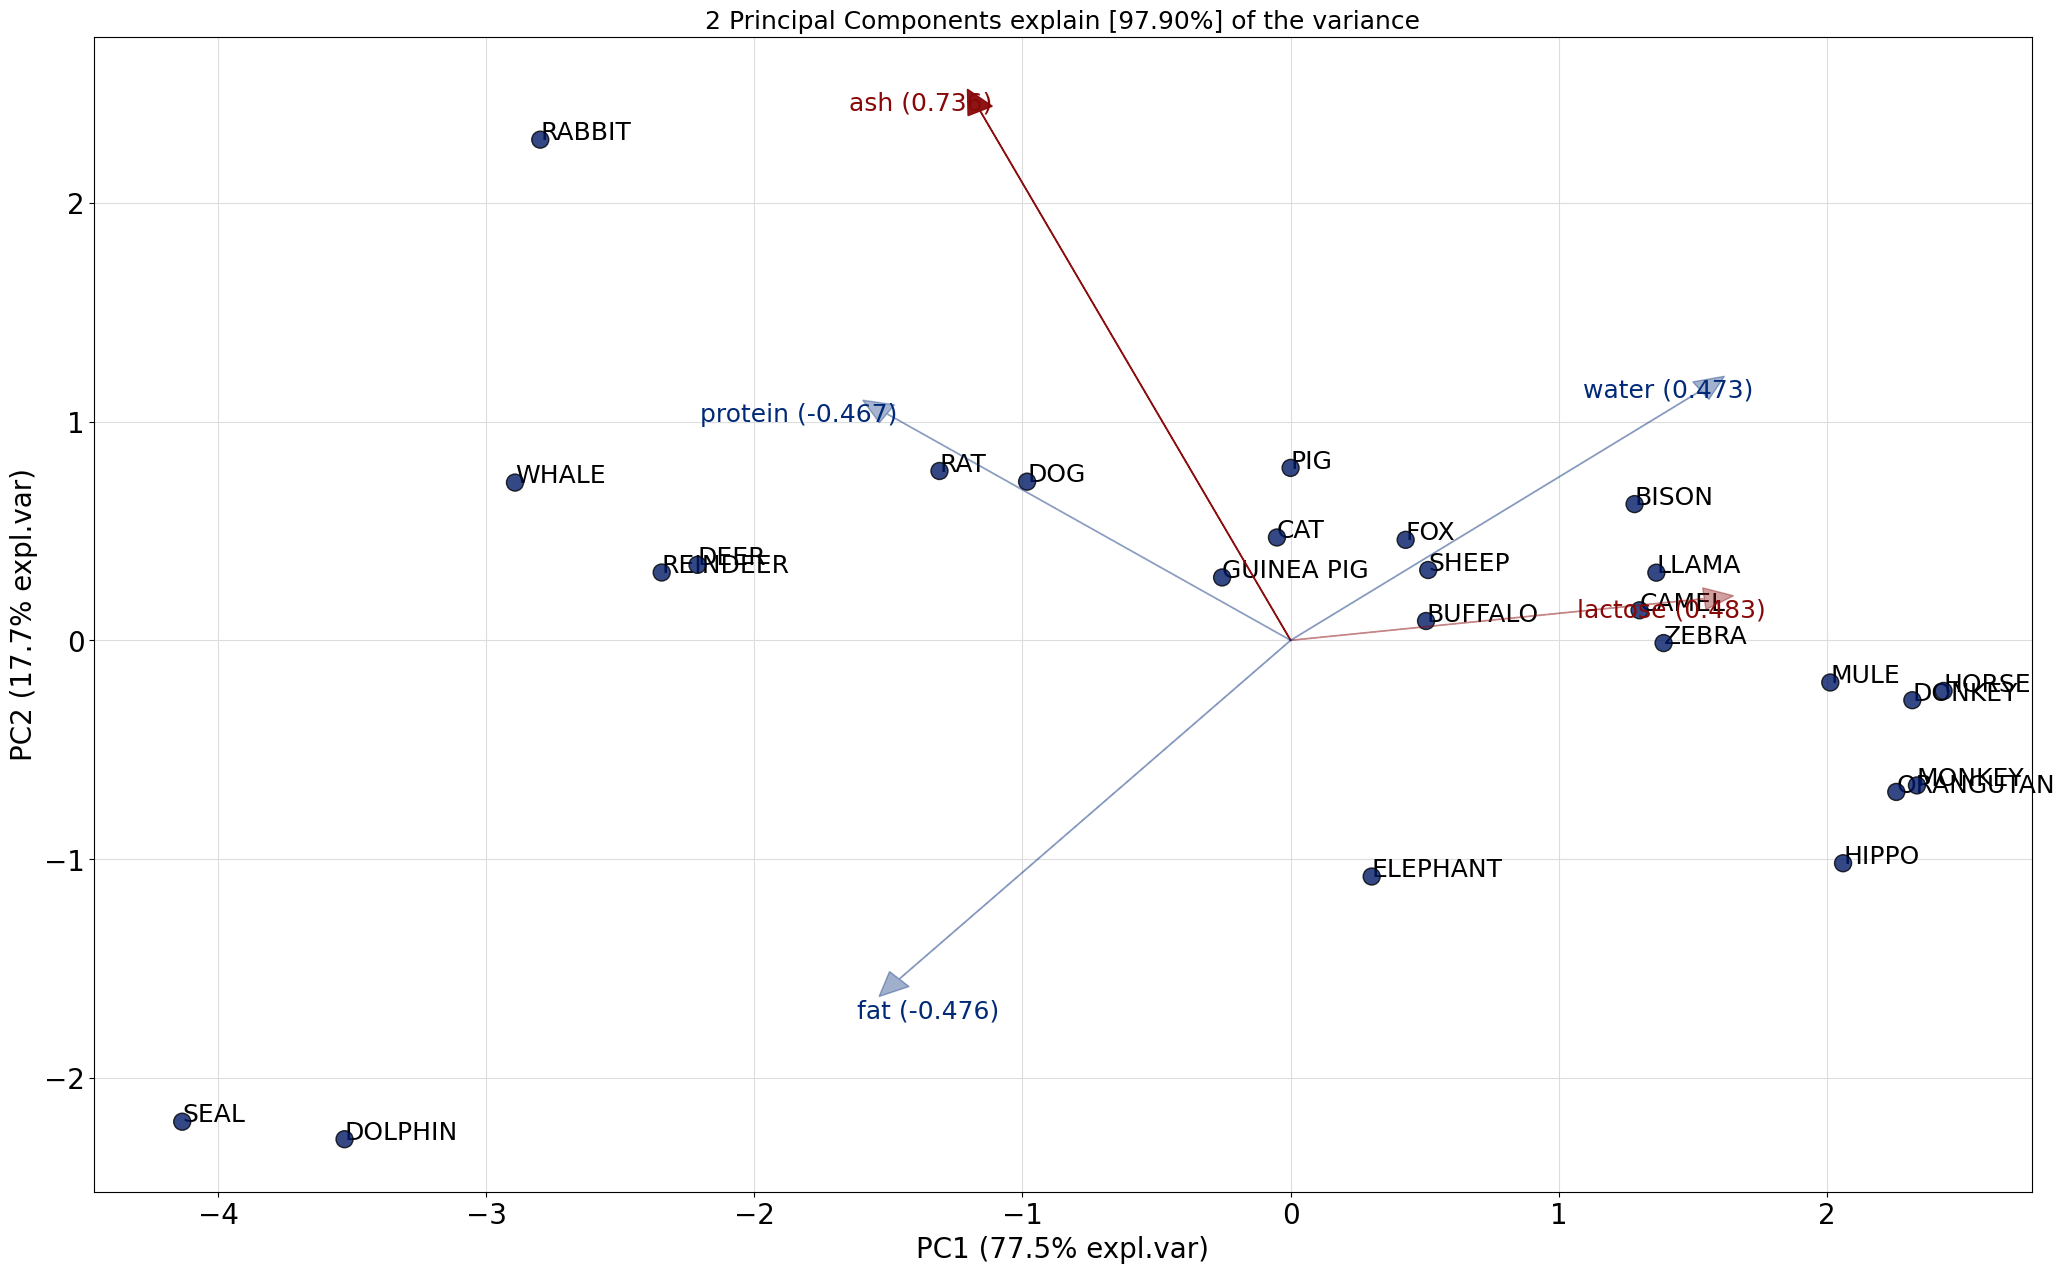

In [37]:
model.biplot(label=True, legend= True)
for i in np.arange(0, milk.shape[0]):
    plt.text(scores.values[i,0], scores.values[i,1], list(milk.index)[i])
plt.show()    